In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

data.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
data.dropna(how="all", inplace=True) # drops the empty line at file-end

data

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# K-Means Clustering and Hierarchical Clustering

Using sepal_len, sepal_wid, petal_len, and petal_wid, we're going to see how well our two different clustering techniques work. Are we able to find clusters within our dataset that correspond to the actual class value?

In [3]:
from sklearn.cluster import KMeans

In [4]:
X = data.drop("class", axis=1)
Y = data["class"]

In [5]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(X)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [6]:
# View the cluster centers.
Kmean.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [7]:
# View what classes belong to what.
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

If we were to view the clustered classes and their actual classes, could we find a pattern?

In [10]:
for actual_class, clustered_class in zip(Y, Kmean.labels_):
    print(actual_class, clustered_class)

Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-setosa 0
Iris-versicolor 2
Iris-versicolor 2
Iris-versicolor 1
Iris-versicolor 2
Iris-versicolor 2
Iris-versicolor 2
Iris-versicolor 2
Iris-versicolor 2
Iris-versicolor 2
Iris-versicolor 2
Iris-versicolor 2
Iris-versicolor 2
Iris-versicolor 2
Iris-versicolor 2
Iris-versicolor 2
Iris-versicolor 2
Iris-versico

Using clustering, we could see that there are 3 distinct classes, which matches up with what we want.

Now let's try it with hierarchical clustering.

In [8]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_clustering = AgglomerativeClustering(
    n_clusters=3, 
)

In [9]:
hierarchical_clusters = hierarchical_clustering.fit_predict(X)
hierarchical_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [13]:
for actual_class, clustered_class in zip(Y, hierarchical_clusters):
    print(actual_class, clustered_class)

Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-setosa 1
Iris-versicolor 0
Iris-versicolor 0
Iris-versicolor 0
Iris-versicolor 0
Iris-versicolor 0
Iris-versicolor 0
Iris-versicolor 0
Iris-versicolor 0
Iris-versicolor 0
Iris-versicolor 0
Iris-versicolor 0
Iris-versicolor 0
Iris-versicolor 0
Iris-versicolor 0
Iris-versicolor 0
Iris-versicolor 0
Iris-versico

# Principal Components Analysis

In [10]:
from sklearn.decomposition import PCA as sklearnPCA
from matplotlib import pyplot as plt
import seaborn as sns

# Step 1: Normalize/Standardize the data.


$$ z = \frac{value-mean}{standarddeviation}$$

In [11]:
X = data.drop("class", axis=1)
Y = data["class"]

In [16]:
type(X)

pandas.core.frame.DataFrame

In [17]:
type(Y)

pandas.core.series.Series

### Intuition

<Axes: xlabel='sepal_len', ylabel='Count'>

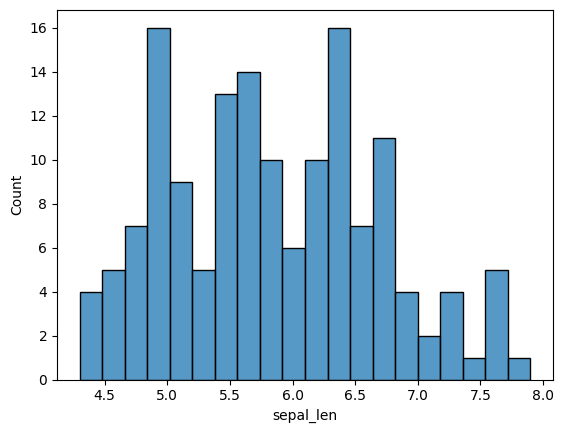

In [18]:
# View the current histogram of sepal_len.
sns.histplot(data=X, x="sepal_len", bins=20)

In [19]:
data['sepal_len'][0]

5.1

In [20]:
# Let's say that we want to standardize row 0 and column sepal_len)
value = 5.1
mean = np.mean(X["sepal_len"])
sd = np.std(X["sepal_len"])
# The z score is the number of sd from the mean (pos or neg)
standardized_score = (value - mean) / sd
print("Standardized Score for Sepal Length at value 5.1: ", standardized_score)


Standardized Score for Sepal Length at value 5.1:  -0.9006811702978088


In [21]:
print("The mean sepal length is ", mean)

The mean sepal length is  5.843333333333334


In [22]:
print("The sd sepal length is ", sd)

The sd sepal length is  0.8253012917851409


In [23]:
data['sepal_wid'][0]

3.5

In [24]:
# Now let's standardize row 0 and column sepal_wid)
value = 3.5
mean = np.mean(X["sepal_wid"])
sd = np.std(X["sepal_wid"])

standardized_score = (value - mean) / sd
print("Standardized Score for Sepal Length at value 3.5: ", standardized_score)

Standardized Score for Sepal Length at value 3.5:  1.0320572244889565


In [25]:
# Let's now standardize row 1 and column sepal_len.
value = 4.9
mean = np.mean(X["sepal_len"])
sd = np.std(X["sepal_len"])

standardized_score = (value - mean) / sd
print("Standardized Score for Sepal Length at value 5.1: ", standardized_score)


Standardized Score for Sepal Length at value 5.1:  -1.1430169111851105


### Doing this in Scikit-Learn

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_X = scaler.fit_transform(X)

In [13]:
# z scores for all values
X["sepal_len"] = standardized_X[:,0]
X["sepal_wid"] = standardized_X[:,1]
X["petal_len"] = standardized_X[:,2]
X["petal_wid"] = standardized_X[:,3]

In [28]:
X["sepal_len"][:2]

0   -0.900681
1   -1.143017
Name: sepal_len, dtype: float64

In [29]:
type(X["sepal_len"])

pandas.core.series.Series

Note that the scores that we calculated exactly match up with what the standard scaler gives us!

Rather than using X, we'll be using the standardized version of X when doing PCA.

### Visualization

<Axes: xlabel='sepal_len', ylabel='Count'>

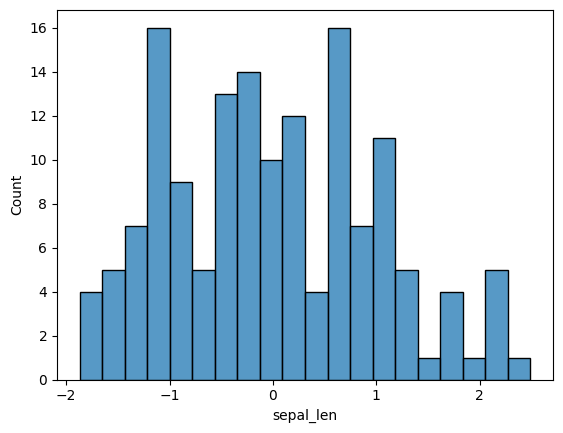

In [30]:
sns.histplot(data=X, x="sepal_len", bins=20)

Notice how this graph looks exactly the same as the previously-plotted graph but just centered around 0! That's all that standardization does!

# Step 2: Use PCA

In [14]:
pca = sklearnPCA(n_components=2)
pca_components = pca.fit_transform(X)

### Intuition

Let's look at the first standardized data point that we have.

In [32]:
X.iloc[0]

sepal_len   -0.900681
sepal_wid    1.032057
petal_len   -1.341272
petal_wid   -1.312977
Name: 0, dtype: float64

Since we cannot visualize 4-dimensional data, we're going to <b>project</b> these four values into a 2-dimensional dataset by using complicated linear algebra.

In [33]:
pca_components[0]

array([-2.26454173,  0.5057039 ])

Essentially, what we've done here is that we've combined the 4 values into 2 values which are -2.26454173 and 0.5057039. In particular, we say that the first value of -2.26454173 is the value of the <b>first principal component</b> and the second value of 0.5057039 is the value of the <b>second principal component</b>.

Even though we magically transformed these 4 variables into 2 variables, how well does this explain our data? 

We could answer this question by looking at the "explained variance ratio" for each of the principal components.

In [15]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]


What this is telling us is that the first principal component accounts for roughly 72% of the entire dataframe and the second principal component is accounting for 23% of the entire dataframe! 

By combining these, we have accounted for 72 + 23 = 95% of the variation of the entire dataframe. Sure, this isn't 100% but we could now visualize this easily.

### Visualization

In [16]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for lab, col in zip(
        ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
        ('blue', 'red', 'green')
    ):
        plt.scatter(
            pca_components[Y==lab, 0],
            pca_components[Y==lab, 1],
            label=lab,
            c=col
        )
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

### Intuition 2

Now that we have our principal components that account for 95% of the variation, how were these calculated?!

In [ ]:
pca.components_

In [ ]:
X

Essentially, what this is saying is that the first principal component is made up of 0.36158968 of the first column (sepal_len), -0.08226889 of the second column (sepal_wid), 0.85657211 of the third column (petal_len), and 0.35884393 of the fourth column (petal_wid)

LP: As 73% of data is explained by pca1 and 0.85 (petal_len) is the highest value of pca1, I expect petal length to have the highest stdev. I will test this:

In [ ]:
sd_sepal_len = np.std(X["sepal_len"])
print(sd_sepal_len)

In [ ]:
sd_sepal_wid = np.std(X["sepal_wid"])
print(sd_sepal_wid)

In [ ]:
sd_petal_len = np.std(X["petal_len"])
print(sd_petal_len)

In [ ]:
sd_petal_wid = np.std(X["petal_wid"])
print(sd_petal_wid)

LP:probably want to do this prior to standardisation